<a href="https://colab.research.google.com/github/iamvisithras/Industrial_Copper_Modeling/blob/main/Industrial_copper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
#packages
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [113]:
df= pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")

In [114]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [116]:
#checking the null values in this dataframe
df.isnull().sum()

,0
id,2
item_date,1
quantity tons,0
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [117]:
#checking the unique values of the all columns

for i in df.columns:
  print(i,":",df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [118]:
df.dtypes

,0
id,object
item_date,float64
quantity tons,object
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [119]:
#converting the datatypes
# item_dat, delivery date, quantity tons

df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date_1"]= pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date_1"]= pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181671 non-null  object 
 1   item_date        181672 non-null  float64
 2   quantity tons    181672 non-null  float64
 3   customer         181672 non-null  float64
 4   country          181645 non-null  float64
 5   status           181671 non-null  object 
 6   item type        181673 non-null  object 
 7   application      181649 non-null  float64
 8   thickness        181672 non-null  float64
 9   width            181673 non-null  float64
 10  material_ref     103754 non-null  object 
 11  product_ref      181673 non-null  int64  
 12  delivery date    181672 non-null  float64
 13  selling_price    181672 non-null  float64
 14  item_date_1      181670 non-null  object 
 15  delivery_date_1  181670 non-null  object 
dtypes: float64(9), int64(1), object(6)
mem

In [121]:
df.isnull().sum()

,0
id,2
item_date,1
quantity tons,1
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [122]:
#removing the "00000" datas in the "material_ref" column
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [123]:
df.isnull().sum()

,0
id,2
item_date,1
quantity tons,1
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [124]:
# "material_ref" have a maximum null values (55%) so, we want to drop the column
# And id is a unique values so we want to drop the column

df.drop(columns=["id","material_ref"],inplace=True)

In [125]:
df.isnull().sum()


,0
item_date,1
quantity tons,1
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0
product_ref,0


In [126]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [127]:
#quantity tons and selling_price have a negative values, This is impossible,
# so we need to replace the negative values

#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [128]:
df.nunique()


,0
item_date,252
quantity tons,181668
customer,1169
country,17
status,9
item type,7
application,30
thickness,594
width,1386
product_ref,33


In [129]:
df.isnull().sum()

,0
item_date,1
quantity tons,5
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0
product_ref,0


Handling the null values using mean(),median() and mode()


In [130]:

# object columns and mode method
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery_date_1"].fillna(df["delivery_date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)

In [131]:
df.isnull().sum()

,0
item_date,0
quantity tons,5
customer,1
country,28
status,0
item type,0
application,24
thickness,1
width,0
product_ref,0


In [132]:
#numarical column and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)


In [133]:

df.isnull().sum()

,0
item_date,0
quantity tons,0
customer,0
country,0
status,0
item type,0
application,0
thickness,0
width,0
product_ref,0


Encoding the catagorical columns

In [134]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [135]:
df["status"].unique()


array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [136]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})


In [137]:
df["status"].unique()


array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [138]:
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

In [139]:
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [141]:
df.to_csv("Industrial_Copper_proper.csv",index= False)

Handling the skewness using (Log Transfermation)

In [142]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [143]:
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']


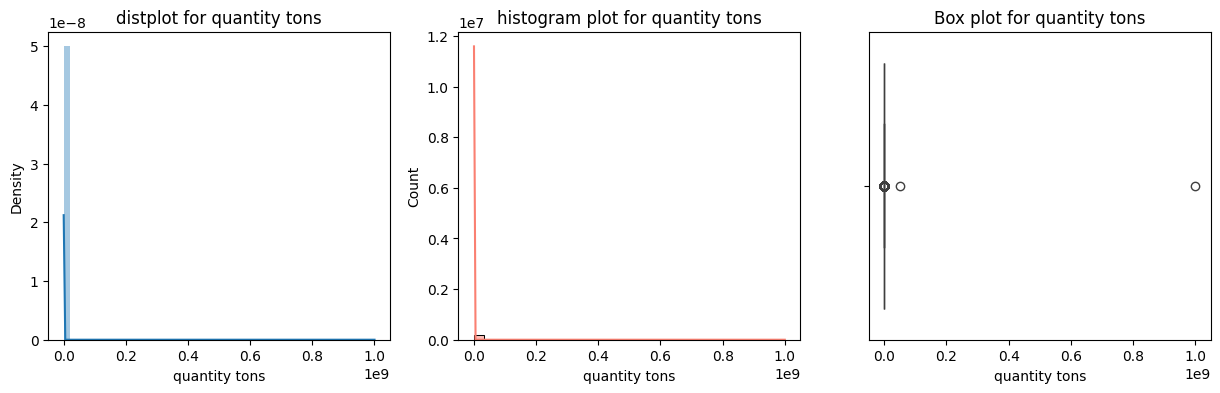

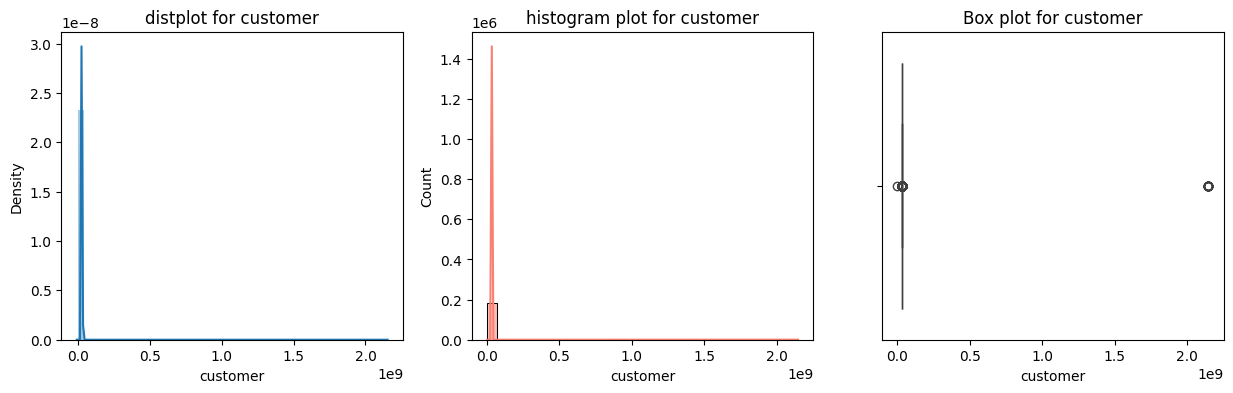

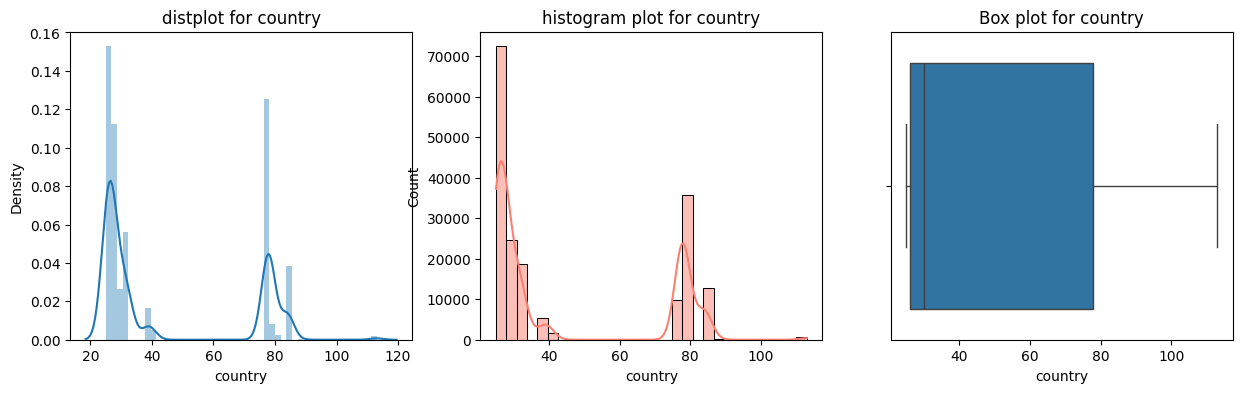

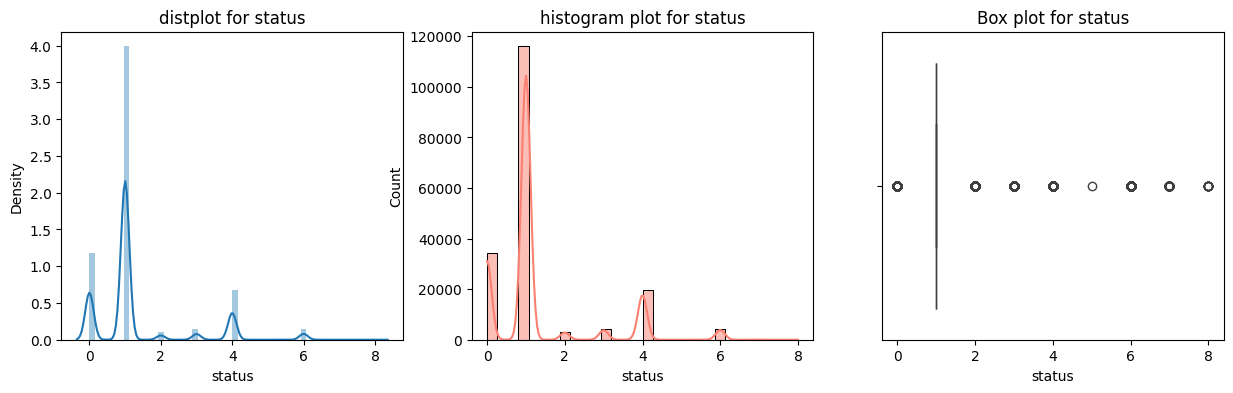

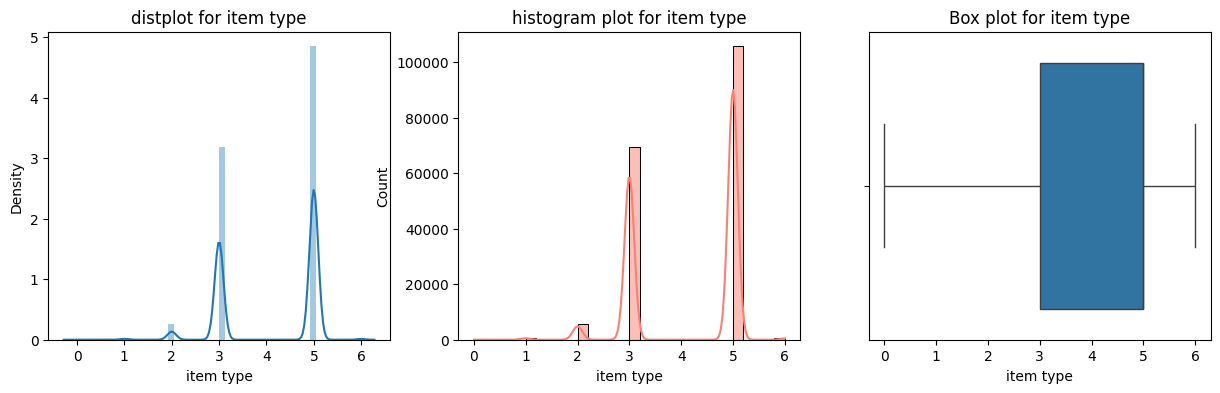

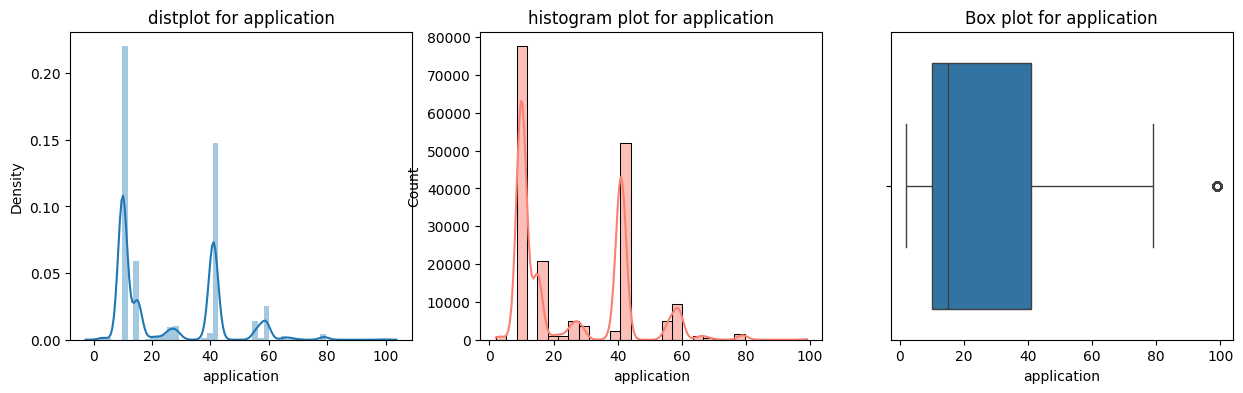

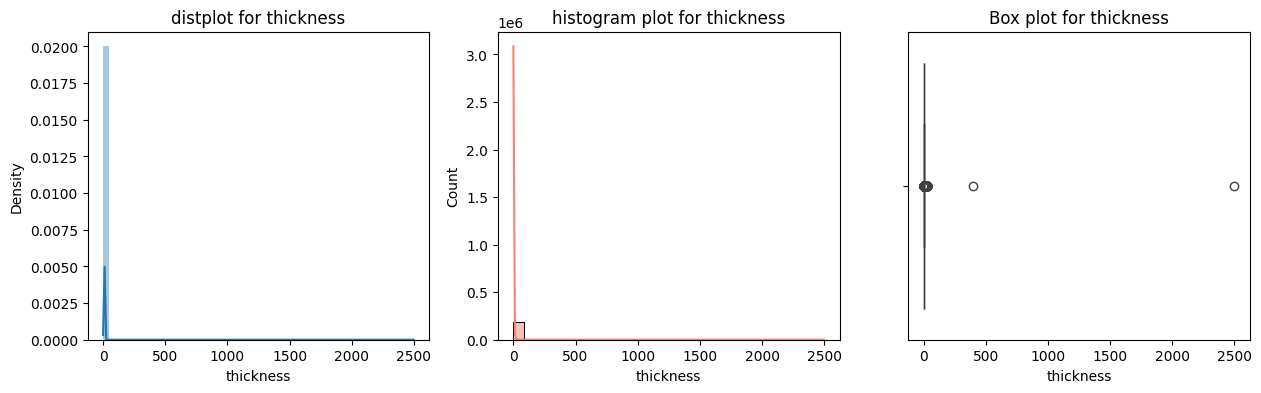

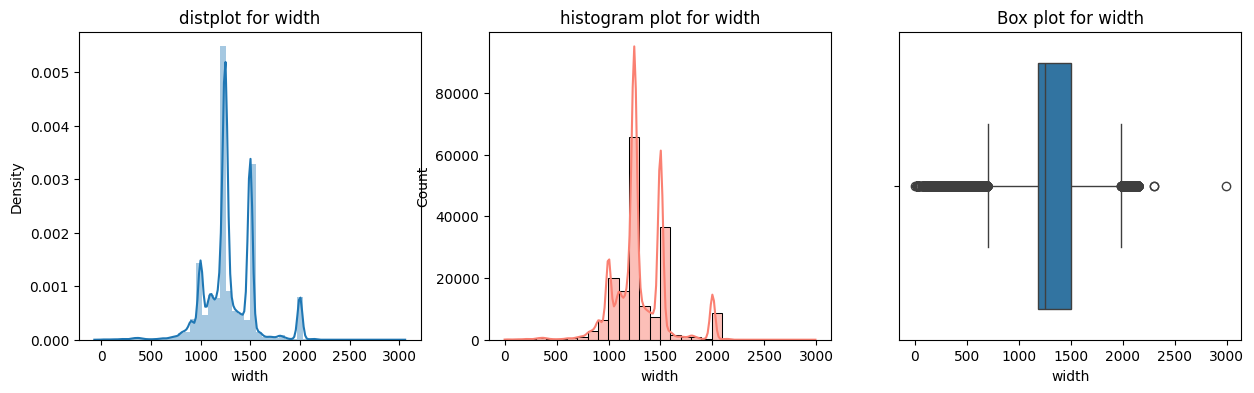

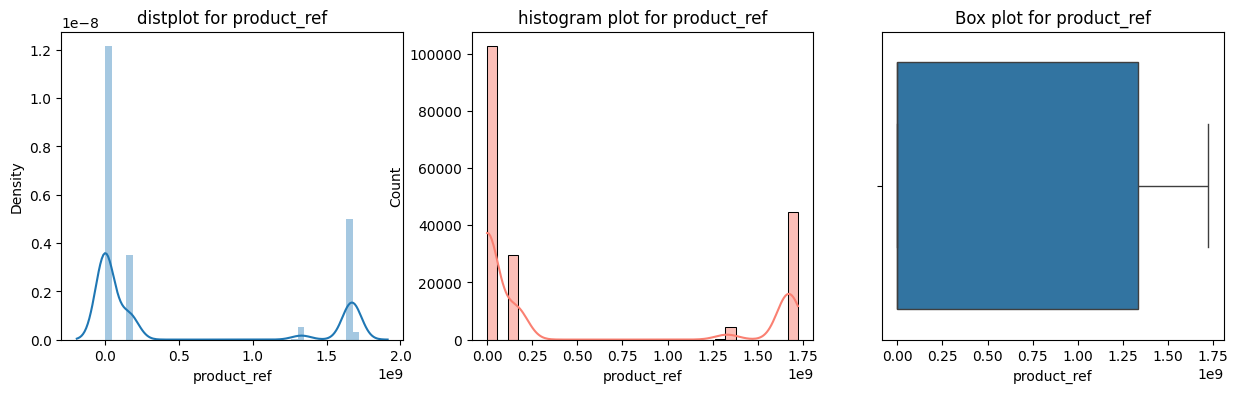

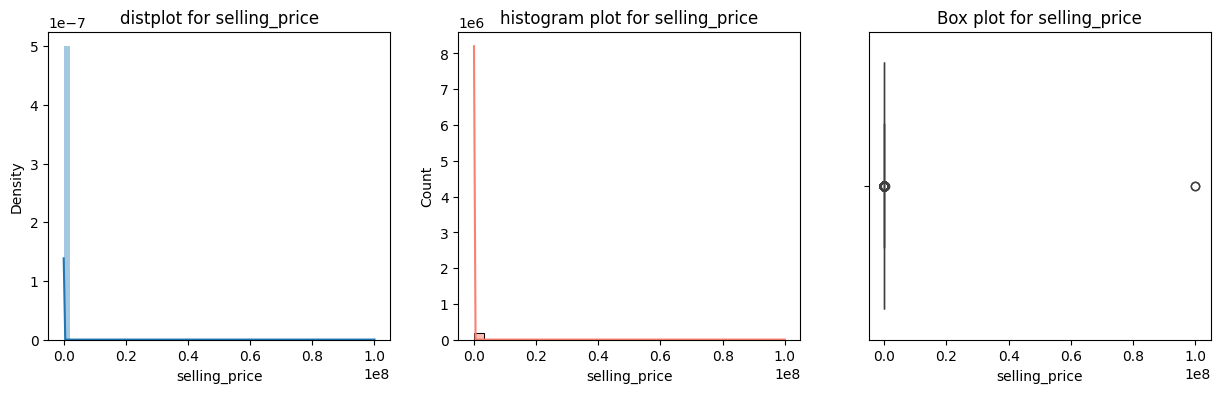

In [144]:
for i in skewed_columns:
  plot(df,i)

In [145]:
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

In [146]:
df1= df.copy()


In [147]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [148]:
df1["quantity_tons_log"]= np.log(df1["quantity tons"])
df1["customer_log"]= np.log(df1["customer"])
df1["thickness_log"]= np.log(df1["thickness"])
df1["selling_price_log"]= np.log(df1["selling_price"])

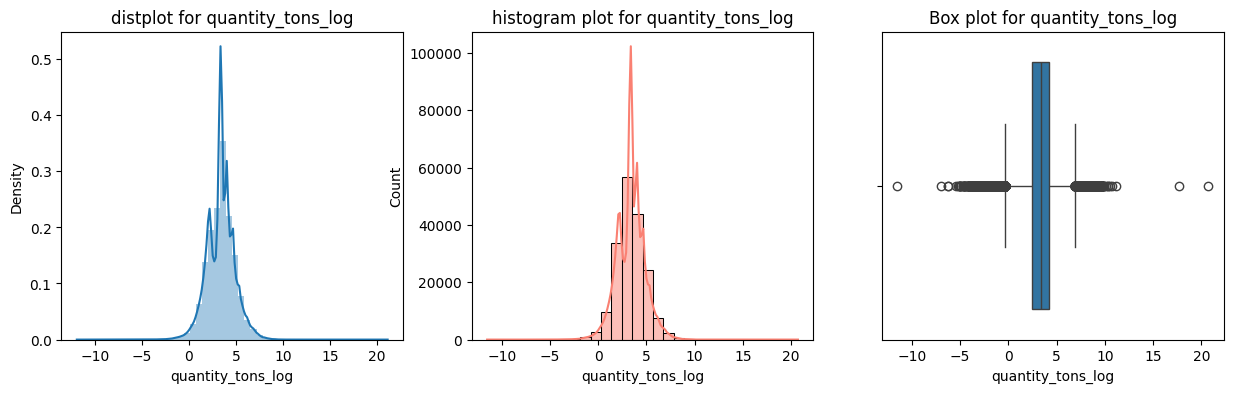

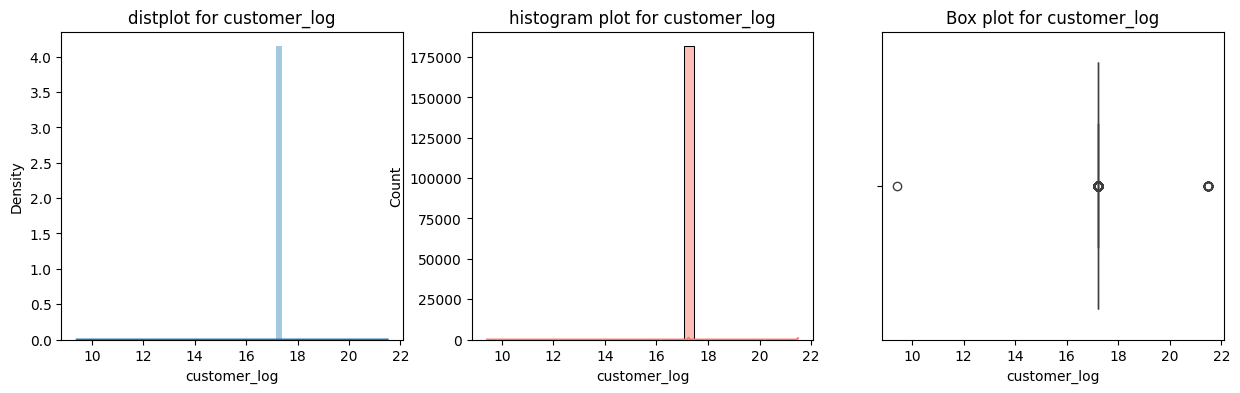

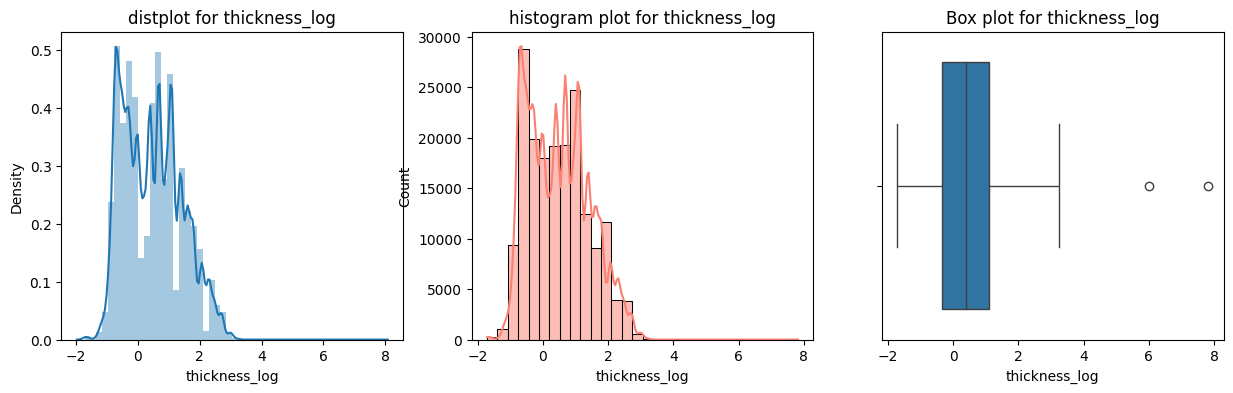

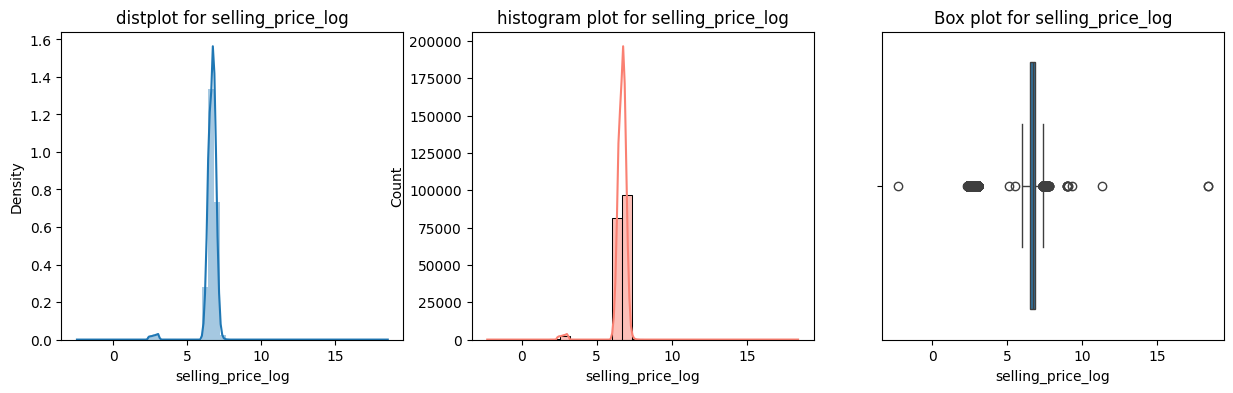

In [149]:
skwed_columns_2=["quantity_tons_log","customer_log","thickness_log","selling_price_log"]
for i in skwed_columns_2:
  plot(df1,i)

Outliers Handling - Interquartile Range(IQR) Method

In [150]:
df2= df1.copy()

In [151]:
df2.head()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [152]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [153]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [154]:
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [158]:
df2.columns


Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [159]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(df2,i)

In [160]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


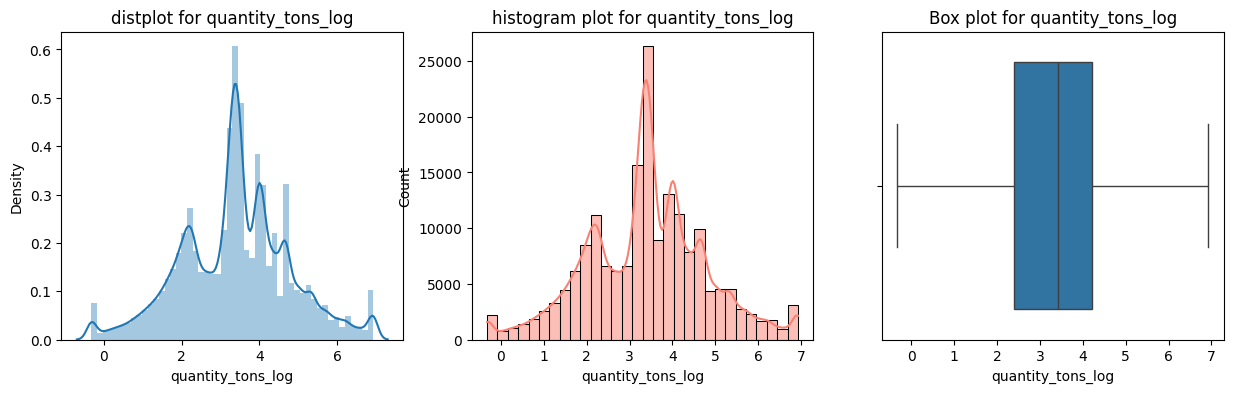

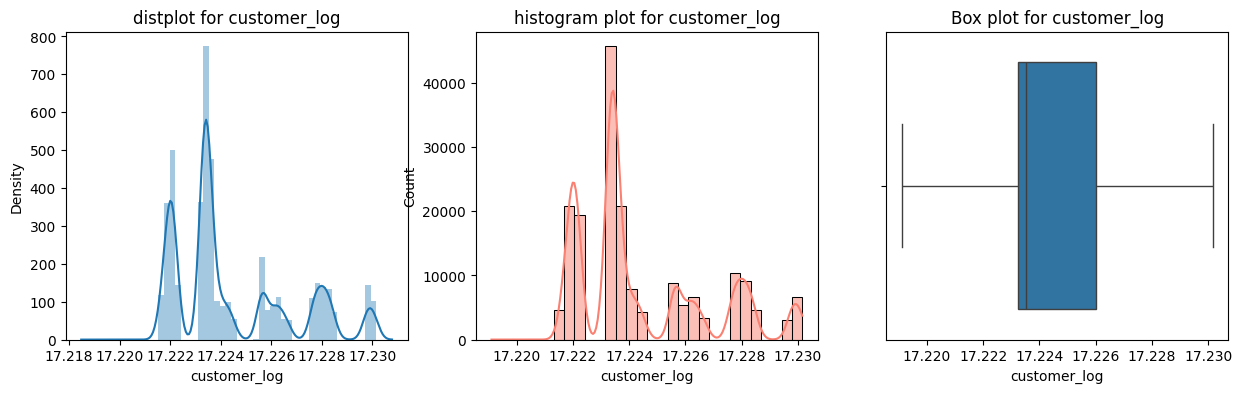

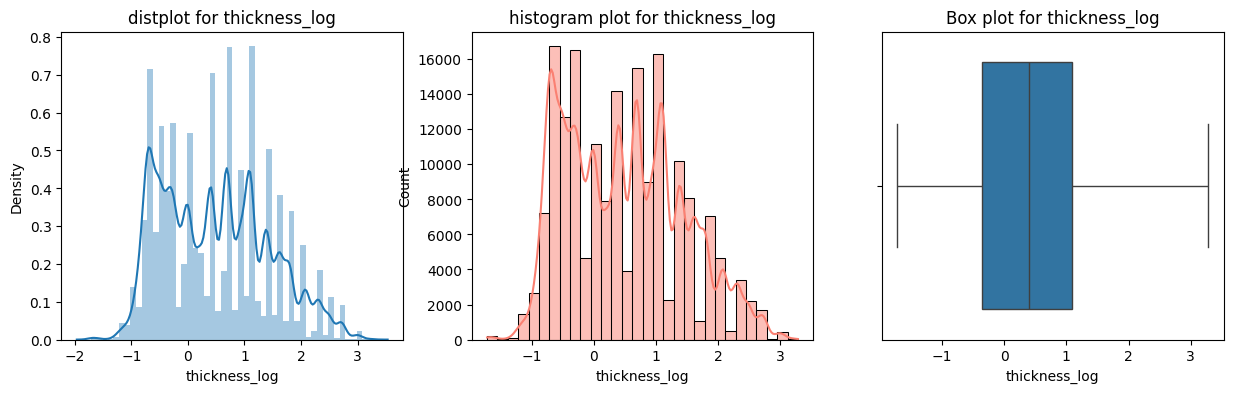

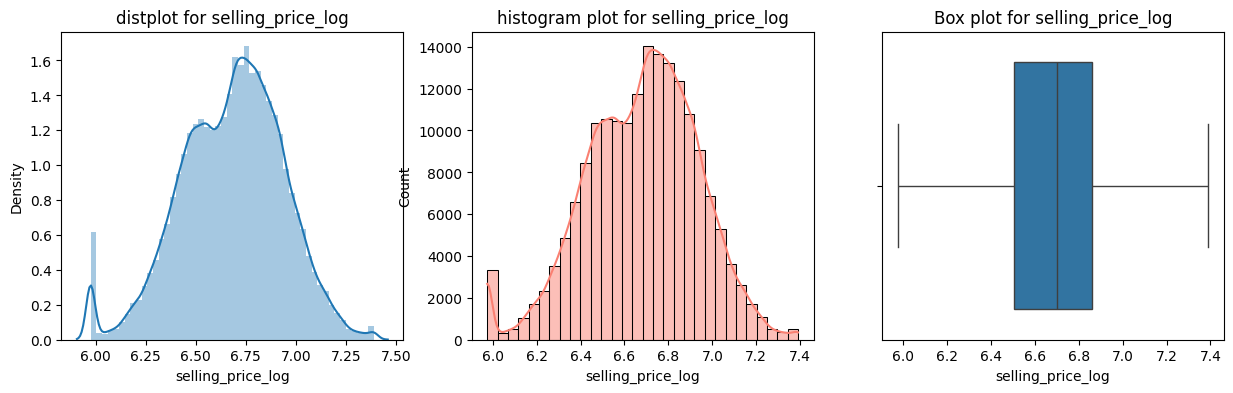

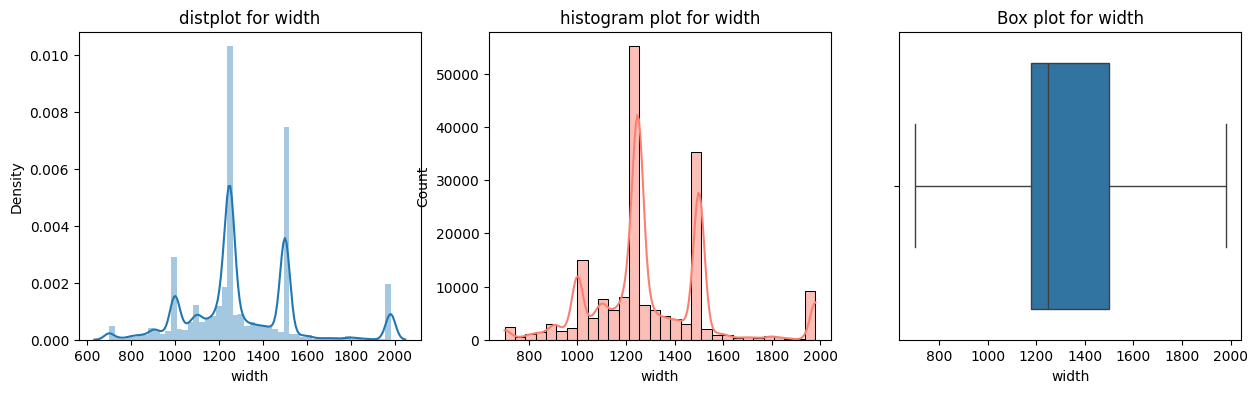

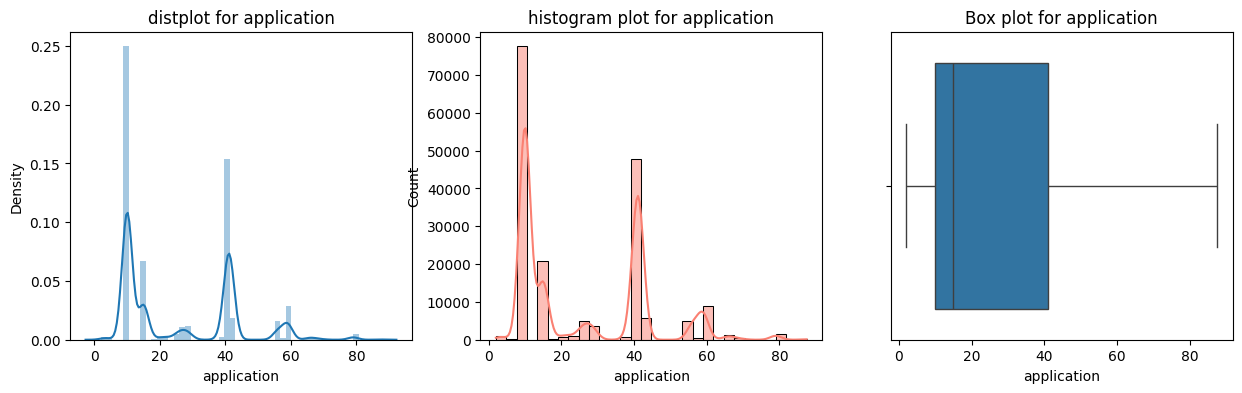

In [161]:
for i in outlier_columns:
  plot(df2,i)


In [162]:
#Droping the unwanted skewed columns
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

df3= df2.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [163]:
df3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


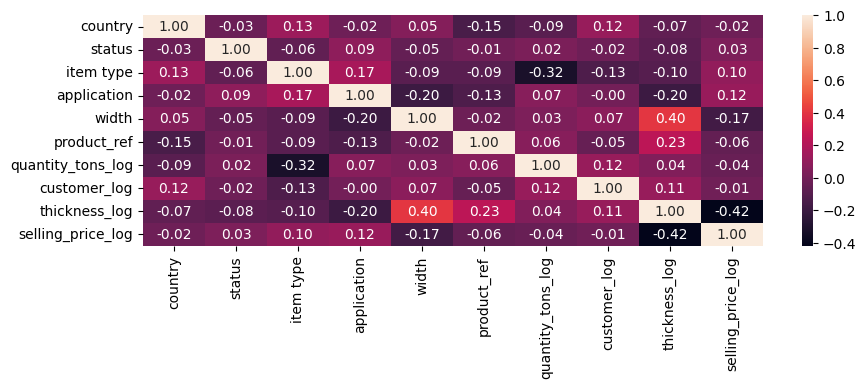

In [164]:
#Checking the correlation with using the heatmap

corr= df3.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [165]:
# the high correlations are "-0.42", "0.40", "-0.32", "-0.20","0.23"

Wrong delivery date handling using ML prediction

In [166]:
df4= df3.copy()

In [167]:
df4.head()


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [168]:
df4.dtypes


,0
item_date,float64
country,float64
status,int64
item type,float64
application,float64
width,float64
product_ref,int64
delivery date,float64
item_date_1,object
delivery_date_1,object


In [169]:
#converting the datatype (object to datetime format)
df4["delivery_date_1"]= pd.to_datetime(df4["delivery_date_1"])
df4["item_date_1"]= pd.to_datetime(df4["item_date_1"])

In [170]:
#identifying the difference of the "delivery date" and the "item date"
df4["date_differ"]= (df4["delivery_date_1"]-df4["item_date_1"]).dt.days

In [171]:
df4["date_differ"]

,date_differ
0,91
1,0
2,-90
3,-90
4,-31
...,...
181668,-1
181669,-1
181670,-1
181671,-1


In [172]:
# some values have a negative values
# it's mean the "delivery date provides , the previous date then the "item date"
# so this is not possible , so we want to predic the delivery date for the some datas

In [173]:
#creating the another 3 columns using the "item_date_1"
# it is usefull for the delivery date prediction
df4["item_date_day"]= df4["item_date_1"].dt.day
df4["item_date_month"]= df4["item_date_1"].dt.month
df4["item_date_year"]= df4["item_date_1"].dt.year


In [174]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [175]:
#separating the posive values(pv) dataframe and negative values(nv) dataframe based on the "date_differ" column
df4_pv= df4[df4["date_differ"]>=0]
df4_pv.reset_index(drop= True, inplace= True)

In [176]:
df4_pv.tail()


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
165560,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [177]:
df4_nv= df4[df4["date_differ"]<0]
df4_nv.reset_index(drop= True, inplace= True)

In [178]:
df4_nv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [179]:
#now we want to create the model for delivery date prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [180]:
df4_pv.columns


Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [181]:
#Find the best algorithm for the "delivery date" prediction

def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= df["date_differ"]

  #teain test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)

  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics

In [182]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer # Import the imputer


def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= df["date_differ"]

  # Impute missing values using the mean strategy
  imputer = SimpleImputer(strategy='mean') # Create an imputer instance
  x = imputer.fit_transform(x) # Impute missing values in x

  #teain test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)

  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics



In [183]:
print(accuracy_date_prediction(df4_pv,DecisionTreeRegressor))
print(accuracy_date_prediction(df4_pv,RandomForestRegressor))
print(accuracy_date_prediction(df4_pv,ExtraTreesRegressor))
print(accuracy_date_prediction(df4_pv,GradientBoostingRegressor))
print(accuracy_date_prediction(df4_pv,AdaBoostRegressor))
print(accuracy_date_prediction(df4_pv,XGBRegressor))

{'R2_score': 0.99684679633498, 'Mean_squared_error': 4.892157158819799, 'Root_mean_squared_error': np.float64(2.2118221354394207), 'Mean_absolute_error': 0.01660979071663697}
{'R2_score': 0.9972004301036499, 'Mean_squared_error': 4.343498665176819, 'Root_mean_squared_error': np.float64(2.084106202950516), 'Mean_absolute_error': 0.01654667351191376}
{'R2_score': 0.9990948090507352, 'Mean_squared_error': 1.4043927551112856, 'Root_mean_squared_error': np.float64(1.1850707806334968), 'Mean_absolute_error': 0.017917736236523443}
{'R2_score': 0.9880396154245589, 'Mean_squared_error': 18.556391289304656, 'Root_mean_squared_error': np.float64(4.30771299987646), 'Mean_absolute_error': 2.947471299295066}
{'R2_score': 0.7640595990057372, 'Mean_squared_error': 366.05866426694763, 'Root_mean_squared_error': np.float64(19.132659623454018), 'Mean_absolute_error': 15.769023861736859}
{'R2_score': 0.999013364315033, 'Mean_squared_error': 1.530784249305725, 'Root_mean_squared_error': np.float64(1.237248

In [71]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.

In [184]:
# Model for the RandomForest

def RandomForest(train_df, test_df):

  x= train_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= train_df["date_differ"]

  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  data= test_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])

  y_pred=model.predict(data)

  return y_pred


In [185]:
date_difference= RandomForest(df4_pv,df4_nv)

In [187]:
date_difference

array([16.96, 16.98,  0.  , ..., 30.  , 30.  , 30.  ])

In [188]:
# changing the "date_differ" datatype float into int
date_difference_1= []
for i in date_difference:
  dd= int(round(i,0))
  date_difference_1.append(dd)

In [189]:
df4_nv["date_differ"]= pd.DataFrame(date_difference_1)

In [190]:
df4_nv.isnull().sum()

,0
item_date,0
country,0
status,0
item type,0
application,0
width,0
product_ref,0
delivery date,0
item_date_1,0
delivery_date_1,0


In [191]:
#find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, date_differ):
  date= item_date + pd.to_timedelta(date_differ,unit= "D")
  return date

In [192]:
df4_nv["delivery_date_1"]= find_delivery_date(df4_nv["item_date_1"],df4_nv["date_differ"])

In [193]:
# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows
df_final=pd.concat([df4_pv,df4_nv],axis=0,ignore_index=True)

In [194]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [195]:
# Now we create the three new columns using the "delivery_date_1"
df_final['delivery_date_day']= df_final["delivery_date_1"].dt.day
df_final['delivery_date_month']= df_final["delivery_date_1"].dt.month
df_final['delivery_date_year']= df_final["delivery_date_1"].dt.year

In [196]:
df_final.head(2)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,...,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021


In [197]:
df_final.columns


Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [198]:
# Droping the unwanted columns
df_final.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1","date_differ"],inplace=True)

In [199]:
df_final.columns


Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [201]:

# Saveing the dataframe
df_final.to_csv("Industrial_Copper_Colab.csv",index= False)

In [202]:
import pandas as pd

In [203]:
# Reading the saved "csv" file
df_final= pd.read_csv("/content/Industrial_Copper_Colab.csv")

In [204]:
# This DataFrame don't have any null values and catagorical columns
# so our dataset is ready to the ML prediction


Classification Method - Predict (Won/Lose)

In [205]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle


In [206]:
df_class= df_final.copy()

In [207]:
# filter the status column only want to be a (won& loss)
df_c= df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]

In [208]:
df_c.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [209]:
df_c["status"].value_counts()


,count
status,
1,116012
0,34438


In [210]:
# This is a imbalanced data
# so we want to resampling the data by usin the "SMOTETomek"

In [211]:
df_c.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [212]:
x= df_c.drop(columns=["status"],axis=1)
y= df_c["status"]

In [213]:
x.shape,y.shape

((150450, 15), (150450,))

In [214]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [215]:
x_new.shape,y_new.shape

((230192, 15), (230192,))

In [216]:
y_new.value_counts()

,count
status,
1,115096
0,115096


In [217]:
# now the data is balanced
# so, we continue the ML prediction

In [218]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics



In [219]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9512794948487869}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9705882352941176}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.973678963110668}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.790794283815221, 'Accuracy_Test': 0.7883017613825191}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8364157527417747, 'Accuracy_Test': 0.8349617813226986}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9450066467264872, 'Accuracy_Test': 0.9327018943170489}


In [220]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9636178022980516}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9809292121896653}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.983883229435913}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7421437608944736, 'Accuracy_Test': 0.7381785008362475}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.82198497988086, 'Accuracy_Test': 0.817459110753926}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.954440057995254, 'Accuracy_Test': 0.9470666174330459}


In [107]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# so we want the reduce the overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [221]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV

x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [222]:
gridsearch.cv_results_

{'mean_fit_time': array([  9.70591607,  10.43307762,  10.06302438,   9.63665919,
          9.73892336,  10.04054732,   9.5090034 ,  10.1507268 ,
         10.98372564,  10.26282325,  10.05324392,   9.90716281,
          9.90438652,   9.61267638,   9.7999639 ,   9.97986965,
         11.23604364,   9.7727612 ,  35.80079384,  34.92843056,
         35.93741903,  37.37267022,  36.86007338,  36.7986454 ,
         39.61971588,  39.90567031,  36.93513999,  21.97476673,
         21.46837802,  21.87382531,  21.21969366,  20.81723447,
         22.3190486 ,  20.81025205,  20.83965631,  20.90113449,
         21.36994715,  21.32613587,  20.99504123,  20.97079883,
         21.85287142,  20.88672786,  20.5271431 ,  21.60169549,
         20.84803076,  87.01511984,  86.04285097,  89.28424087,
         88.99346399,  86.53189106,  86.72045183,  85.37960343,
         86.72990923,  87.36356978,  39.31799169,  37.60054622,
         36.92476468,  35.6580606 ,  35.76132798,  36.38261032,
         35.7754509 ,  

In [223]:
gridsearch.best_score_

np.float64(0.8820491664147472)

In [224]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [225]:

# Passing the best Hypertuning paramers in the ,
# RandomForest algorithm and check the accuracy for training and testing


In [226]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))


Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9866306820958659
Accuracy_Test:  0.9686787289037555
  
Confution_matrix for Test
--------------------------
[[22506   375]
 [ 1067 22091]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22881
           1       0.98      0.95      0.97     23158

    accuracy                           0.97     46039
   macro avg       0.97      0.97      0.97     46039
weighted avg       0.97      0.97      0.97     46039



In [227]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [228]:

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.01638914 1.        ]
[0.         0.95392521 1.        ]
 
auc_curve: 0.9687680327998701


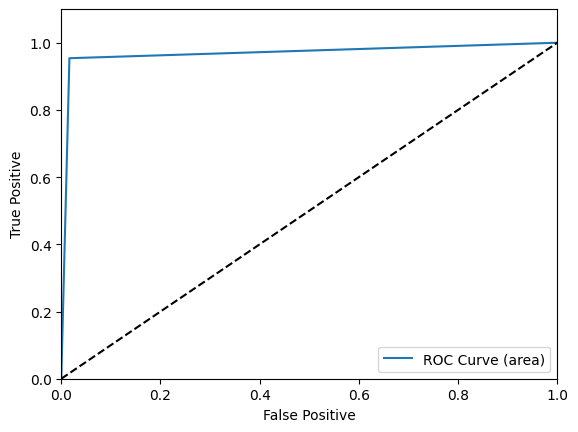

In [229]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [230]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


In [231]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [232]:
with open("/content/Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [233]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


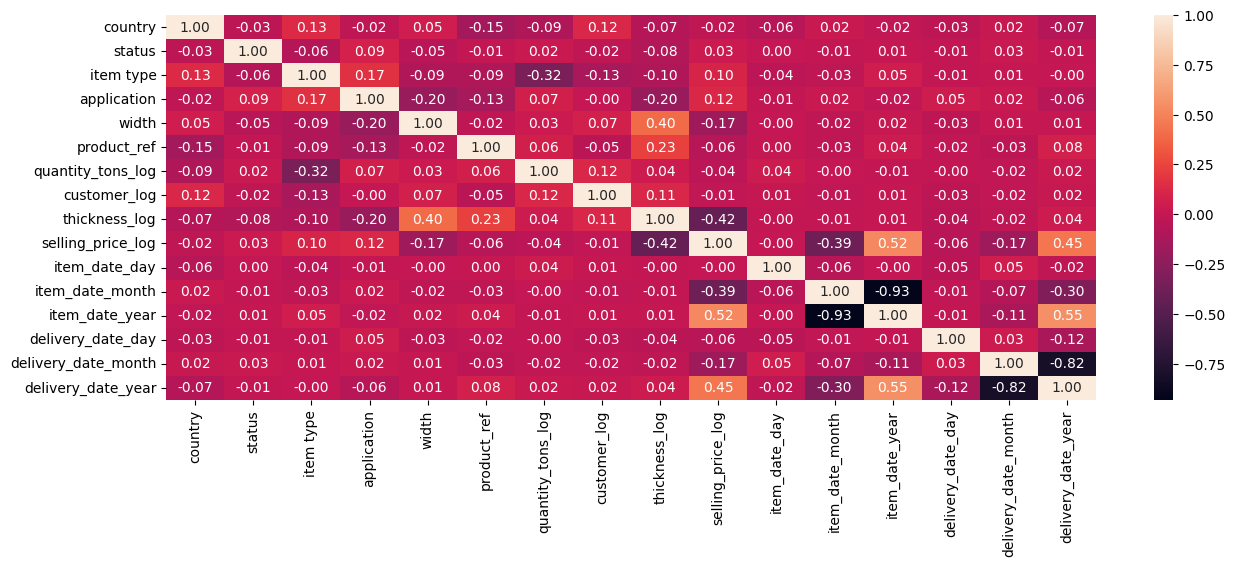

In [234]:
corr= df_final.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True, fmt="0.2f")
plt.show()

Regression Method - Predict the Selling Price

In [235]:
#packages

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [236]:
df_regg= df_final.copy()

In [237]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics


In [238]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer # Import the imputer


def accuracy_regressor(df, algorithm):
  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  # Impute missing values using the mean strategy
  imputer = SimpleImputer(strategy='mean') # Create an imputer instance
  x = imputer.fit_transform(x) # Impute missing values in x

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [239]:
print(accuracy_regressor(df_regg, DecisionTreeRegressor))
print(accuracy_regressor(df_regg, RandomForestRegressor))
print(accuracy_regressor(df_regg, ExtraTreesRegressor))
print(accuracy_regressor(df_regg, AdaBoostRegressor))
print(accuracy_regressor(df_regg, GradientBoostingRegressor))
print(accuracy_regressor(df_regg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9249074428435224}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9940114191628062, 'R2_Test': 0.9572449865528918}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9543903893950373}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.6569555208691411, 'R2_Test': 0.6547934086713002}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.8864957501395824, 'R2_Test': 0.8868505151006435}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.9525703768287005, 'R2_Test': 0.9465297584133381}


In [240]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [241]:
x= df_regg.drop(columns=["selling_price_log"], axis=1)
y= df_regg["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [2,4,10,20],
               "min_samples_split": [2,5,10],
               "min_samples_leaf": [1,2,4],
               "max_features": ["sqrt","log2",None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [242]:
gridsearch_r.cv_results_

{'mean_fit_time': array([  5.17463613,   5.30348454,   5.27208118,   5.36496549,
          5.05954313,   5.2612216 ,   5.11234508,   5.03521514,
          5.26393108,   5.0777617 ,   4.93852463,   5.01205087,
          5.01245408,   5.07779531,   5.03569751,   5.07809401,
          5.24901824,   5.14974856,  19.54860296,  19.11872382,
         19.16307764,  19.22847638,  22.21657343,  19.05948548,
         20.2957118 ,  19.14926982,  19.13054948,   9.11927142,
          9.69336586,   9.5851685 ,   9.44530087,   9.2102941 ,
          9.5226234 ,   9.54389067,   8.95656481,   9.35383973,
          9.26051793,   9.87282915,   9.82383771,   9.06800575,
          8.99685493,   9.29254084,   9.42674551,   9.72732024,
          9.11512513,  37.32781649,  37.53989434,  38.52759967,
         36.56308093,  36.12700229,  36.34624877,  36.82277341,
         37.00244336,  37.45182586,  19.23247724,  20.28060861,
         20.30599713,  19.96880074,  20.42664146,  20.74419956,
         19.98718376,  

In [243]:
gridsearch_r.best_score_

np.float64(0.9533274052719157)

In [244]:
gridsearch_r.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [245]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test


(0.9865132170285645, 0.9560750854824099)

In [246]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.956748911005192,
 'Mean Absolute Error': 0.03235402030419166,
 'Mean Squared Error': 0.002847785511152574,
 'Root Mean Squared Error': np.float64(0.053364646641316515)}

In [247]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.147494621949842
Predicted selling price without Log:  1270.9178334724834


In [248]:
import pickle


In [249]:
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)

In [250]:
with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [251]:
df_final.head()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


In [252]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.882601549003808
Predicted selling price without Log:  975.1599891808057


In [253]:
!pip install streamlit
!pip install streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 17.5 MB/s eta 0:00:00


In [254]:
%%writefile my_app.py

import streamlit as st
import pickle
import numpy as np
import sklearn
from streamlit_option_menu import option_menu


# Functions
def predict_status(ctry,itmtp,aplcn,wth,prdrf,qtlg,cstlg,tknslg,slgplg,itmdt,itmmn,itmyr,deldtdy,deldtmn,deldtyr):

    #change the datatypes "string" to "int"
    itdd= int(itmdt)
    itdm= int(itmmn)
    itdy= int(itmyr)

    dydd= int(deldtdy)
    dydm= int(deldtmn)
    dydy= int(deldtyr)
    #modelfile of the classification
    with open("/content/Classification_model.pkl","rb") as
        model_class=pickle.load(f)

    user_data= np.array([[ctry,itmtp,aplcn,wth,prdrf,qtlg,cstlg,tknslg,
                       slgplg,itdd,itdm,itdy,dydd,dydm,dydy]])

    y_pred= model_class.predict(user_data)

    if y_pred == 1:
        return 1
    else:
        return 0

def predict_selling_price(ctry,sts,itmtp,aplcn,wth,prdrf,qtlg,cstlg,
                   tknslg,itmdt,itmmn,itmyr,deldtdy,deldtmn,deldtyr):

    #change the datatypes "string" to "int"
    itdd= int(itmdt)
    itdm= int(itmmn)
    itdy= int(itmyr)

    dydd= int(deldtdy)
    dydm= int(deldtmn)
    dydy= int(deldtyr)
    #modelfile of the classification
    with open("/content/Regression_Model.pkl","rb") as f:
        model_regg=pickle.load(f)

    user_data= np.array([[ctry,sts,itmtp,aplcn,wth,prdrf,qtlg,cstlg,tknslg,
                       itdd,itdm,itdy,dydd,dydm,dydy]])

    y_pred= model_regg.predict(user_data)

    ac_y_pred= np.exp(y_pred[0])

    return ac_y_pred


st.set_page_config(layout= "wide")

st.title(":blue[**INDUSTRIAL COPPER MODELING**]")

with st.sidebar:
    option = option_menu('Menu', options=["HOME","PREDICT SELLING PRICE", "PREDICT STATUS"])

if option == "HOME":

    st.header("INDUSTRIAL COPPER MODELING")
    st.write(" ")
    st.write('''***The copper industry deals with less complex data related to sales and pricing. However, this data may suffer from issues such as skewness and noisy data, which can affect the accuracy of manual predictions. Dealing with these challenges manually can be time-consuming and may not result in optimal pricing decisions. A machine learning regression model can address these issues by utilizing advanced techniques such as data normalization, feature scaling, and outlier detection, and leveraging algorithms that are robust to skewed and noisy data.
Another area where the copper industry faces challenges is in capturing the leads. A lead classification model is a system for evaluating and classifying leads based on how likely they are to become a customer . You can use the STATUS variable with WON being considered as Success and LOST being considered as Failure and remove data points other than WON, LOST STATUS values.***''')

    st.write("The solution must include the following steps: ")

    st.write("1. Exploring skewness and outliers in the dataset.")
    st.write("2. Transform the data into a suitable format and perform any necessary cleaning and pre-processing steps.")
    st.write("3. ML Regression model which predicts continuous variable ‘Selling_Price’.")
    st.write("4. ML Classification model which predicts Status: WON or LOST.")
    st.write("5. Creating a streamlit page where you can insert each column value and you will get the Selling_Price predicted value or Status(Won/Lost)")

if option == "PREDICT STATUS":

    st.header("PREDICT STATUS (Won / Lose)")
    st.write(" ")

    col1,col2= st.columns(2)

    with col1:
        country= st.number_input(label="**Enter the Value for COUNTRY**/ Min:25.0, Max:113.0")
        item_type= st.number_input(label="**Enter the Value for ITEM TYPE**/ Min:0.0, Max:6.0")
        application= st.number_input(label="**Enter the Value for APPLICATION**/ Min:2.0, Max:87.5")
        width= st.number_input(label="**Enter the Value for WIDTH**/ Min:700.0, Max:1980.0")
        product_ref= st.number_input(label="**Enter the Value for PRODUCT_REF**/ Min:611728, Max:1722207579")
        quantity_tons_log= st.number_input(label="**Enter the Value for QUANTITY_TONS (Log Value)**/ Min:-0.322, Max:6.924",format="%0.15f")
        customer_log= st.number_input(label="**Enter the Value for CUSTOMER (Log Value)**/ Min:17.21910, Max:17.23015",format="%0.15f")
        thickness_log= st.number_input(label="**Enter the Value for THICKNESS (Log Value)**/ Min:-1.71479, Max:3.28154",format="%0.15f")

    with col2:
        selling_price_log= st.number_input(label="**Enter the Value for SELLING PRICE (Log Value)**/ Min:5.97503, Max:7.39036",format="%0.15f")
        item_date_day= st.selectbox("**Select the Day for ITEM DATE**",("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"))
        item_date_month= st.selectbox("**Select the Month for ITEM DATE**",("1","2","3","4","5","6","7","8","9","10","11","12"))
        item_date_year= st.selectbox("**Select the Year for ITEM DATE**",("2020","2021"))
        delivery_date_day= st.selectbox("**Select the Day for DELIVERY DATE**",("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"))
        delivery_date_month= st.selectbox("**Select the Month for DELIVERY DATE**",("1","2","3","4","5","6","7","8","9","10","11","12"))
        delivery_date_year= st.selectbox("**Select the Year for DELIVERY DATE**",("2020","2021","2022"))


    button= st.button(":violet[***PREDICT THE STATUS***]",use_container_width=True)

    if button:
        status= predict_status(country,item_type,application,width,product_ref,quantity_tons_log,
                               customer_log,thickness_log,selling_price_log,item_date_day,
                               item_date_month,item_date_year,delivery_date_day,delivery_date_month,
                               delivery_date_year)

        if status == 1:
            st.write("## :green[**The Status is WON**]")
        else:
            st.write("## :red[**The Status is LOSE**]")

if option == "PREDICT SELLING PRICE":

    st.header("**PREDICT SELLING PRICE**")
    st.write(" ")

    col1,col2= st.columns(2)

    with col1:
        country= st.number_input(label="**Enter the Value for COUNTRY**/ Min:25.0, Max:113.0")
        status= st.number_input(label="**Enter the Value for STATUS**/ Min:0.0, Max:8.0")
        item_type= st.number_input(label="**Enter the Value for ITEM TYPE**/ Min:0.0, Max:6.0")
        application= st.number_input(label="**Enter the Value for APPLICATION**/ Min:2.0, Max:87.5")
        width= st.number_input(label="**Enter the Value for WIDTH**/ Min:700.0, Max:1980.0")
        product_ref= st.number_input(label="**Enter the Value for PRODUCT_REF**/ Min:611728, Max:1722207579")
        quantity_tons_log= st.number_input(label="**Enter the Value for QUANTITY_TONS (Log Value)**/ Min:-0.3223343801166147, Max:6.924734324081348",format="%0.15f")
        customer_log= st.number_input(label="**Enter the Value for CUSTOMER (Log Value)**/ Min:17.21910565821408, Max:17.230155364880137",format="%0.15f")


    with col2:
        thickness_log= st.number_input(label="**Enter the Value for THICKNESS (Log Value)**/ Min:-1.7147984280919266, Max:3.281543137578373",format="%0.15f")
        item_date_day= st.selectbox("**Select the Day for ITEM DATE**",("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"))
        item_date_month= st.selectbox("**Select the Month for ITEM DATE**",("1","2","3","4","5","6","7","8","9","10","11","12"))
        item_date_year= st.selectbox("**Select the Year for ITEM DATE**",("2020","2021"))
        delivery_date_day= st.selectbox("**Select the Day for DELIVERY DATE**",("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"))
        delivery_date_month= st.selectbox("**Select the Month for DELIVERY DATE**",("1","2","3","4","5","6","7","8","9","10","11","12"))
        delivery_date_year= st.selectbox("**Select the Year for DELIVERY DATE**",("2020","2021","2022"))


    button= st.button(":violet[***PREDICT THE SELLING PRICE***]",use_container_width=True)

    if button:
        price= predict_selling_price(country,status,item_type,application,width,product_ref,quantity_tons_log,
                               customer_log,thickness_log,item_date_day,
                               item_date_month,item_date_year,delivery_date_day,delivery_date_month,
                               delivery_date_year)


        st.write("## :green[**The Selling Price is :**]",price)


Writing my_app.py


In [261]:
!wget -q -O - ipv4.icanhazip.com

34.141.193.120


In [256]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 6s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [262]:
! streamlit run my_app.py & npx localtunnel --port 8501

⠙⠹


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.193.120:8501

your url is: https://cyan-crabs-know.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
  Stopping...
^C


In [257]:

!npm audit fix --force

npm warn using --force Recommended protections disabled.
⠙⠹⠸⠼⠴⠦npm warn audit Updating localtunnel to 1.8.3, which is a SemVer major change.
⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙npm warn deprecated cryptiles@2.0.5: This version has been deprecated in accordance with the hapi support policy (hapi.im/support). Please upgrade to the latest version to get the best features, bug fixes, and security patches. If you are unable to upgrade at this time, paid support is available for older versions (hapi.im/commercial).
⠹⠸⠼⠴⠦⠧npm warn deprecated sntp@1.0.9: This module moved to @hapi/sntp. Please make sure to switch over as this distribution is no longer supported and may contain bugs and critical security issues.
⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦npm warn deprecated request@2.81.0: request has been deprecated, see https://github.com/request/request/issues/3142
⠦npm warn deprecated har-validator@4.2.1: this library is no longer supported
⠦npm warn deprecated uuid@3.4.0: Please upgrade  to version 7 or